In [10]:
import pandas as pd

dados = pd.read_csv('reviews.csv')
print(dados.head(10))

                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   
5  2ce2db50-eec3-4cf5-afd6-b153ca01cf0f   Shopee   
6  404d8ede-bf3e-4652-a410-ec1ad12e40df   Shopee   
7  0d7c4353-a8f6-467c-abd7-c65b26fd4976   Shopee   
8  5410fc9e-d51f-4f6f-9fdc-01b93eed8750   Shopee   
9  31458c8f-8f11-496f-b72e-dacc9470a52f   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...

In [11]:
dados.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [12]:
#removendo caracteres nao latinos

import regex

dados['content'] = dados['content'].apply(lambda x: regex.sub(r'[^\p{Latin}]', ' ', str(x)))

In [13]:
dados.loc[0, 'content']


'O app da Shopee é razoável  Apesar de ser fácil de utilizar  apresenta alguns bugs  Por exemplo  Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  Sugestões de produtos que não têm nada a ver com coisas de nosso interesse  Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  Falhas para carregar certos anexos para avaliação dos produtos  No geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

In [14]:
#colocando todo texto para minusculo

dados['content'] = dados['content'].apply(lambda x: str(x).lower())

In [15]:
dados.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

STOPWORDS

In [16]:
import nltk #caso não funcione, adicione a linha nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)
dados['content'] = dados['content'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biels\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
dados.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

APLICANDO BOW

In [18]:
from sklearn.feature_extraction.text import CountVectorizer  # Importação da classe CountVectorizer da biblioteca sklearn

# Inicialização do vetor de contagem (CountVectorizer)
vectorizer = CountVectorizer()

# Transformação dos dados em uma matriz de Bag of Words (BoW)
BOW_matriz = vectorizer.fit_transform(dados['content'])  
# 'fit_transform()' aprende o vocabulário e transforma os dados em uma matriz esparsa de contagem de palavras

# Conversão da matriz esparsa para um DataFrame para melhor visualização
BOW_dataframe = pd.DataFrame(BOW_matriz.toarray(), columns=vectorizer.get_feature_names_out())
# 'toarray()' converte a matriz esparsa em uma matriz densa (array NumPy)
# As colunas do DataFrame são nomeadas com as palavras do vocabulário

# Exibição do DataFrame
BOW_dataframe



,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TREINAMENTO E TESTE

In [19]:
textos_bow = BOW_dataframe
categorias = dados['sentiment']
categorias_polaridade = dados['sentiment_polarity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.2) #20% para teste.
X_trainp, X_testp, y_trainp, y_testp = train_test_split(textos_bow, categorias_polaridade, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

NAIVE BAYES

In [20]:
from sklearn.naive_bayes import MultinomialNB
# Inicialização do classificador Naive Bayes Multinomial
naive_bayes = MultinomialNB()  # Criação do modelo Naive Bayes Multinomial
naive_bayesp = MultinomialNB() 

# Treinamento do modelo Naive Bayes usando os dados de treinamento
naive_bayes.fit(X_train, y_train)  # O modelo naive_bayes é treinado com o conjunto de dados X_train e as respectivas labels y_train
naive_bayesp.fit(X_trainp, y_trainp)

# Predição usando o modelo treinado
predicoes = naive_bayes.predict(X_test)  # O modelo naive_bayes faz predições no conjunto de teste X_test (20% dos dados de teste sem as categorias)
predicoesp = naive_bayesp.predict(X_testp)


RESULTADOS DOS TESTES

In [21]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(y_test, predicoes))
#print("Classes em y_test:", np.unique(y_test))
#print("Classes em predicoes:", np.unique(predicoes))
# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.66      0.55      0.60       156
     disgust       0.54      0.62      0.58       182
        fear       0.00      0.00      0.00         9
   happiness       0.88      0.38      0.53        61
     neutral       0.00      0.00      0.00        16
     sadness       0.59      0.79      0.68       178
    surprise       0.00      0.00      0.00         1

    accuracy                           0.60       603
   macro avg       0.38      0.33      0.34       603
weighted avg       0.60      0.60      0.58       603



C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_testp, predicoesp))

              precision    recall  f1-score   support

    negative       0.83      0.86      0.84       321
     neutral       0.00      0.00      0.00        19
    positive       0.80      0.82      0.81       263

    accuracy                           0.81       603
   macro avg       0.54      0.56      0.55       603
weighted avg       0.79      0.81      0.80       603



C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

MATRIZ DE CONFUSAO USANDO MAPA DE VALOR SEABORN

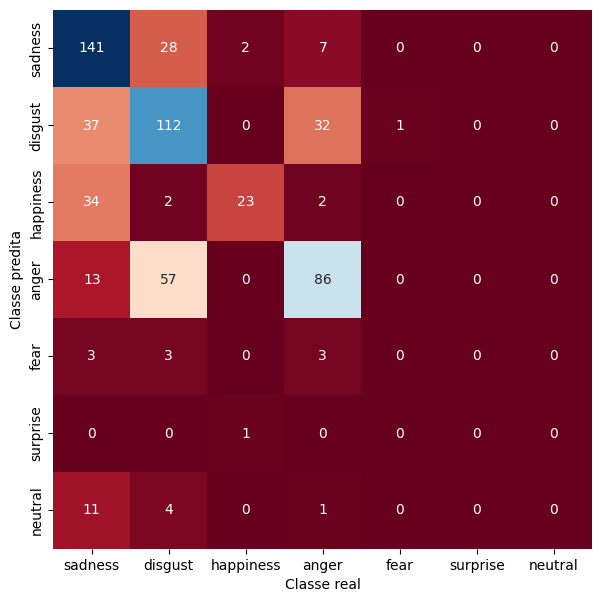

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_labels = dados['sentiment'].unique()

# Geração da matriz de confusão
cm = confusion_matrix(y_test, predicoes, labels = sentiment_labels)

# Ajuste da plotagem da matriz de confusão
plt.figure(figsize=(10, 7))  # Ajuste o tamanho do gráfico conforme necessário
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
            xticklabels=categorias.unique(), yticklabels=categorias.unique())

plt.xlabel('Classe real')
plt.ylabel('Classe predita')
plt.show()


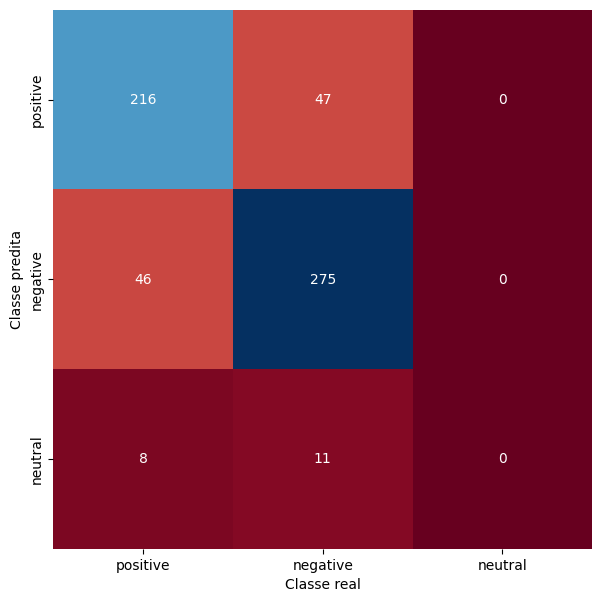

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_labels = dados['sentiment_polarity'].unique()

# Geração da matriz de confusão
cm = confusion_matrix(y_testp, predicoesp, labels = sentiment_labels)

# Ajuste da plotagem da matriz de confusão
plt.figure(figsize=(10, 7))  # Ajuste o tamanho do gráfico conforme necessário
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
            xticklabels=categorias_polaridade.unique(), yticklabels=categorias_polaridade.unique())

plt.xlabel('Classe real')
plt.ylabel('Classe predita')
plt.show()

3 COMENTARIOS